<a href="https://colab.research.google.com/github/acelvaros/devtraining-createnotes-jakarta/blob/master/Adatelemz%C3%A9s_%C3%A9s_vizualiz%C3%A1ci%C3%B3_Pythonban_Part_1_handout_BI_Forum_'25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Adatelemzés és vizualizáció Pythonban - Part 1 - BI Forum '25**
---

# Bevezető

**Mi az a pandas?**
- A Python meghatározó adatfeldolgozó könyvtára
- Nagyon sok  eljárást nyújt az adatok elérésére, átalakítására és elemzésére
- Az adatokat egy memóriában lévő speciális struktúrában kezeli


**Mi az a Dataframe?**

- A DataFrame a pandas alapvető adatstruktúrája
- 2 dimenziós, változtatható méretű táblázat
- A táblázat sorokból és oszlopokból áll, ezeket címkék azonosítják


In [1]:
!pip show pandas

Name: pandas
Version: 2.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

In [2]:
#Csomagimportálás
import pandas as pd

In [ ]:
# @title
# DataFrame kiíratásánál összes oszlopot megjeleníti
# pd.set_option('display.max_columns', None)

# DataFrame kiíratásánál összes sort megjeleníti
# pd.set_option('display.max_rows', None)


---



# Tábla: Videójátékok

## Adatok betöltése

In [ ]:
# Adatbetöltés
# DataFrame létrehozása csv fájlból

#df = pd.read_csv("/content/vgchartz-2024.csv")

df = pd.read_csv('https://raw.githubusercontent.com/CzibiBIC/biforum25/refs/heads/main/datasets/vgchartz-2024.csv')
df.head()

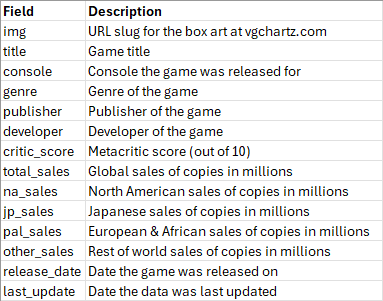

## Adattábla áttekintése

In [ ]:
# A táblázat oszlopainak neve
df.columns

In [ ]:
# A táblázat sorainak és oszlopainak száma
# (sor, oszlop)
df.shape

In [ ]:
# Adathatlmaz szerkezete (oszlopok + hiányzó értékek + adattípusok)
df.info()

In [ ]:
# Numerikus oszlopok statisztikai áttekintése
df.describe()

In [ ]:
# Adathalmaz megtekintése rendezés alapján
df.sort_values(by='critic_score', ascending=False).head()

In [ ]:
# Adott oszlop első értékeinek megtekintése
df['genre'].head()

In [ ]:
# Adott oszlop adattípusának lekérdezése
df['genre'].dtype

In [ ]:
# Változó egyedi értékei
df['genre'].unique()

In [ ]:
# Egyedi értékek darabszáma
df['genre'].nunique()

In [ ]:
# Értékek gyakorisága
df['genre'].value_counts()

In [ ]:
# Query
df.query('genre == "Sandbox"')

# Alternatív szűrés
# df[df["genre"]=="Sandbox"]

In [ ]:
# Egyedi játékok és gyakoriságuk a sandbox kategóriában
sandbox_df = df.query('genre == "Sandbox"')
sandbox_df.title.value_counts()

# Akár láncolva is írhatjuk:
# df.query('genre == "Sandbox"').title.value_counts()

## Hiányzó értékek


In [ ]:
# Üres cellák (na/null) száma oszloponként
# ".isnull is an alias of .isna"
df.isna().sum()

In [ ]:
# Üres cellák eldobása
# Dokumentáció: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna

# Default: eldobja az összes *sort* amiben *legalább egy* üres cella van, és *nem írja felül* a df-et
modified_df = df.dropna()

In [ ]:
# Adat behelyettesítése üres cella helyére
df.fillna({'developer':'Other'}, inplace = True)

# Másképpen:
# df['developer'] = df['developer'].fillna('Other')

In [ ]:
df.query('developer == "Other" ')

## Adatellenőrzés

#### 1) A total_sales értékei helyesek?

In [ ]:
#Kalkulált összesítő oszlop a sales-nek
df['total_sales_calced'] = df['na_sales'] + df['pal_sales'] + df['jp_sales'] + df['other_sales']

In [ ]:
# Oszlopok leszűrése egy kisebb dataframe-be
sales_df = df[['title', 'console', 'publisher', 'total_sales', 'total_sales_calced']]

# Kalkulált oszlop összehasonlítása az eredeti total_sales oszloppal
sales_df.query('(total_sales - total_sales_calced) > 0.03') # hibahatárt lehet növelni

#### 2) A dátumok helyesek?

A release_date (játék megjelenése) mindig korábbi kell legyen mint a last_updated (sor legutóbbi frissítése)!

Számoljuk ki a dátumok közötti időt.

In [ ]:
# Fontos hogy az adattípus datetime legyen!
# Oszlopok adattípusának lekérése
df.dtypes

In [ ]:
# Adattípus módosítása
df['release_date'] = pd.to_datetime(df['release_date'])
df['last_update'] = pd.to_datetime(df['last_update'])

# Új oszlop létrehozása
df['time_between'] = df['last_update'] - df['release_date']
df.head()

In [ ]:
# Oszlopok leszűrése egy kisebb dataframe-be
dates_df = df[['title', 'console', 'publisher', 'release_date', 'last_update', 'time_between']]

In [ ]:
#Itt nem lehet query-vel szűrni, mert azon belül nem ismeri fel a pd funkciókat, pl. timedelta
dates_df[dates_df['time_between'] < pd.Timedelta("0 days")].sort_values('time_between')

In [ ]:
# Másik megoldás
dates_df.query('last_update < release_date').sort_values('time_between')

#### Hibás adatok törlése

In [ ]:
# Törlés
df = df.query('last_update >= release_date')

In [ ]:
# Leellenőrizzük
df.query('last_update < release_date')

#### Hibás adatok javítása

In [ ]:
# Reseteljük a táblát ha kell
df = pd.read_csv('https://raw.githubusercontent.com/CzibiBIC/biforum25/refs/heads/main/datasets/vgchartz-2024.csv')

# Adattípus módosítása
df['release_date'] = pd.to_datetime(df['release_date'])
df['last_update'] = pd.to_datetime(df['last_update'])

# Új oszlop létrehozása
df['time_between'] = df['last_update'] - df['release_date']

In [ ]:
# Javítás (végigiterálunk a táblázat sorain)
for x in df.index:
  if df.loc[x, "last_update"] < df.loc[x, "release_date"]: # ha kisebb
    df.loc[x, "last_update"] = df.loc[x, "release_date"] # felülírjuk

In [ ]:
# Leellenőrizzük
df.query('last_update < release_date')

## Aggregálás

In [ ]:
# Title-re aggregált -- átlagos pont, sum eladás
df_agg = df.groupby('title').agg({'total_sales':'sum', 'critic_score':'mean'}).reset_index()
df_agg

## Vizualizálás

Adatainkat könnyen vizualizálhatjuk a Plotly könyvtár express moduljának segítségével.

In [ ]:
# importáljuk be a modult
import plotly.express as px

In [ ]:
# mi is ez a könyvtár?
!pip show plotly

### Top 5 legtöbbet értékesített játék

In [ ]:
# bar method használata
top10_bar = px.bar(df_agg.sort_values('total_sales', ascending=False).head(), x='title', y='total_sales', title='Top 5 legtöbbet értékesített játék')
top10_bar.show()

### Bar chart testreszabása

Próbáljuk meg kicsit szebbé varázsolni a chartunkat.

In [ ]:
# használjunk inkább horizontal bar chartot
top10_bar = px.bar(df_agg.sort_values('total_sales', ascending=False).head(), x='total_sales', y='title', title='Top 5 legtöbbet értékesített játék')

# tengely rendezése
top10_bar.update_yaxes(categoryorder = 'total ascending')

top10_bar.show()

In [ ]:
# használjunk data labeleket
top10_bar = px.bar(df_agg.sort_values('total_sales', ascending=False).head(), x='total_sales', y='title',
                   title='Top 5 legtöbbet értékesített játék',
                   # x tengely értékeinek használata
                   text_auto = True)

top10_bar.update_yaxes(categoryorder = 'total ascending')

top10_bar.update_traces(textposition = 'outside')

# texttemplate használata, hogy tudjuk mi az egység
top10_bar.update_traces(texttemplate = '%{x}M')

top10_bar.show()

In [ ]:
# színezés egy másik dimenzióval
top10_bar = px.bar(df_agg.sort_values('total_sales', ascending=False).head(), x='total_sales', y='title',
                   title='Top 5 legtöbbet értékesített játék',
                   text_auto = True,
                   color = 'critic_score')

top10_bar.update_yaxes(categoryorder = 'total ascending')

top10_bar.update_traces(textposition = 'outside')

top10_bar.update_traces(texttemplate = '%{x}M')

top10_bar.show()

In [ ]:
# remove to improve

top10_bar.update_layout(template = 'simple_white')

top10_bar.update_yaxes(title_text='')

top10_bar.update_xaxes(visible = False)

In [ ]:
# végső simítások
top10_bar = px.bar(df_agg.sort_values('total_sales', ascending=False).head(), x='total_sales', y='title',
                   title='Top 5 legtöbbet értékesített játék',
                   text_auto = True,
                   color = 'critic_score',
                   # labelek módosítása
                   labels = {'critic_score':'Értékelés',
                             'total_sales':'Eladások száma',
                             'title':'Játék címe'},
                   # chart mérete
                   width = 1000, height = 550
                   )

top10_bar.update_traces(textposition = 'inside', texttemplate = '%{x}M')

# subtitle használata
top10_bar.update_layout(template = 'simple_white', title_x = 0.5, title_subtitle_text = 'Eladások száma millióban az összes platformot figyelembe véve')

top10_bar.update_yaxes(title_text='',categoryorder = 'total ascending')

top10_bar.update_xaxes(visible = False)

top10_bar.show()



---



# Tábla: Forma1

### Nézzétek meg a következőket:

* Milyen oszlopok vannak, melyik mit jelenthet?
* Vannak-e hiányzó értékek benne?
* Melyik mező alapján határozzuk meg, hogy ki volt a legjobb versenyző?


In [ ]:
# code cell to solve the task

*Abbreviations:*
* *DNF = Did not finish*
* *NC = Non-classified finish*

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/CzibiBIC/biforum25/refs/heads/main/datasets/formula1_2022season_raceresults.csv")
df.head(50)

### Aggregáljunk:
* Melyik csapat teljesített a leggyengébben pontszám alapján?
* Melyik tracken volt a leghosszabb a "leggyorsabb kör"?

In [ ]:
# code cell to solve the task

## Vizualizálás

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
# dictionary, hogy könnyen el tudjuk készíteni a round number oszlopot
track_to_round = {
    'Bahrain': 1,
    'Saudi Arabia': 2,
    'Australia': 3,
    'Emilia Romagna': 4,
    'Miami': 5,
    'Spain': 6,
    'Monaco': 7,
    'Azerbaijan': 8,
    'Canada': 9,
    'Great Britain': 10,
    'Austria': 11,
    'France': 12,
    'Hungary': 13,
    'Belgium': 14,
    'Netherlands': 15,
    'Italy': 16,
    'Singapore': 17,
    'Japan': 18,
    'United States': 19,
    'Mexico': 20,
    'Brazil': 21,
    'Abu Dhabi': 22
}

In [ ]:
# df resetelése
df = pd.read_csv('https://raw.githubusercontent.com/CzibiBIC/biforum25/refs/heads/main/datasets/formula1_2022season_raceresults.csv')

In [ ]:
df['Round number'] = df['Track'].map(track_to_round)
df

### Konstruktőri bajnokság a szezon során

Vizualizáljuk egy line charton, hogy hogyan változott a konstruktőri bajnokság állása a szezon során a top csapatok között.

In [ ]:
# először aggregáljunk
df_f1_agg = df.groupby(['Team', 'Round number']).agg({'Points': 'sum'}).reset_index()
df_f1_agg

In [ ]:
# szükségünk lesz a kumulatív összegére a pontoknak
df_f1_agg['Cumulative points'] = df_f1_agg.groupby('Team')['Points'].cumsum()
df_f1_agg

In [ ]:
df_f1_top_agg = df_f1_agg.query('Team in ["Red Bull Racing RBPT", "Ferrari", "Mercedes", "Alpine Renault", "McLaren Mercedes"]')

In [ ]:
# mostmár kezdhetjük is a line chartot
f1_line = px.line(df_f1_top_agg, x='Round number', y='Cumulative points', color='Team'
                  ,width = 1000, height = 550)
f1_line.show()

In [ ]:
f1_line = px.line(df_f1_top_agg, x='Round number', y='Cumulative points', color='Team',
                  width = 1000, height = 550, markers = True)
f1_line.show()

In [ ]:
f1_line = px.line(df_f1_top_agg, x='Round number', y='Cumulative points', color='Team',
                  markers = True, width = 1000, height = 550)

f1_line.update_xaxes(type = 'category')

f1_line.show()

In [ ]:
# csapatok színei dictionaryben tárolva
color_map = {
    'Red Bull Racing RBPT': '#00174C',
    'Ferrari': 'red',
    'Mercedes': '#00A19B',
    'Alpine Renault': 'pink',
    'McLaren Mercedes': '#FF8000'
}

In [ ]:
f1_line = px.line(df_f1_top_agg, x='Round number', y='Cumulative points', color='Team',
                  markers = True,
                  width = 1000, height = 550,
                  color_discrete_map = color_map)

f1_line.update_xaxes(type = 'category')

f1_line.show()

In [ ]:
f1_line = px.line(df_f1_top_agg, x='Round number', y='Cumulative points', color='Team',
                  markers = True,
                  width = 1000, height = 550,
                  color_discrete_map= color_map,
                  template = 'plotly_white'
                  )

f1_line.update_xaxes(type = 'category')

#f1_line.update_layout(yaxis_gridcolor = 'grey')

f1_line.show()

In [ ]:
f1_line = px.line(df_f1_top_agg, x='Round number', y='Cumulative points', color='Team',
                  markers = True,
                  width = 1000, height = 550,
                  color_discrete_map= color_map,
                  template = 'plotly_white',
                  title='F1 Constructors title race'
                  )

f1_line.update_xaxes(type = 'category')

f1_line.update_layout(title_x = 0.5, title_subtitle_text = 'Over 20 rounds of the 2022 season')

f1_line.show()

#### Faceting

In [ ]:
f1_line = px.line(df_f1_top_agg, x='Round number', y='Cumulative points', color='Team',
                  markers = True,
                  width = 1000, height = 550,
                  color_discrete_map= color_map,
                  template = 'plotly_white',
                  title='F1 Constructors title race',
                  facet_col='Team'
                  )

f1_line.update_xaxes(type = 'category')

f1_line.update_layout(title_x = 0.5, title_subtitle_text = 'Over 20 rounds of the 2022 season', width = 1300)

f1_line.show()

### Bar chart race

#### Code

In [ ]:
bar_race = px.bar(df_f1_top_agg, x='Cumulative points', y='Team',
                   title='F1 Constructors title race',
                   text_auto = True,
                   color = 'Team',
                   color_discrete_map= color_map,
                   #width = 1700,
                   height = 550, animation_frame='Round number', range_x = [0,800]
                   )

bar_race.update_traces(textposition = 'outside')

f1_line.update_xaxes(type = 'category')

bar_race.update_layout(template = 'simple_white', title_x = 0.5, title_subtitle_text = 'Over 20 rounds of the 2022 season')

bar_race.update_yaxes(title_text='',categoryorder = 'total ascending')

bar_race.update_xaxes(visible = False)

#### Chart

In [ ]:
bar_race.show()

# Tábla: Édességek

### Nézzétek meg a következőket:

* Hogy néz ki a tábla első 10 sora?
* Hány üres cellát tartalmaz oszloponként?
* Milyen adattípusúak az oszlopok?
* Milyen tartományban mozognak a 'percent' oszlopok? *(Hasznos: .min(), .max())*

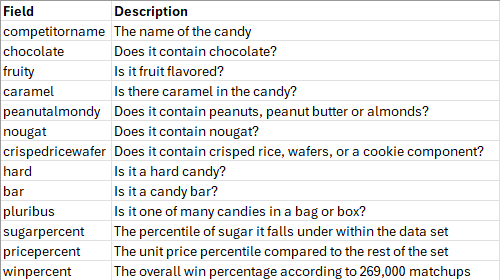

In [ ]:
# Adat beolvasása
df = pd.read_csv("https://raw.githubusercontent.com/CzibiBIC/biforum25/refs/heads/main/datasets/candy-data.csv")

In [ ]:
# code cell to solve the task

### Feladatok:

* Percent oszlopok formátumának egymáshoz igazítása
* Legmagasabb cukortartalmú édesség megtalálása
* A táblában lévő édességek hány százaléka csokis? *(##.#% formátumban)*
* Rangsor oszlop létrehozása winpercent alapján *(Hasznos: .rank())*
* Tábla sorbarendezése a rangsor alapján



In [ ]:
# code cell to solve the task

### Aggregálás márka alapján

* Hozzunk létre egy Brand oszlopot az édesség nevének első szava alapján *(Hasznos: .split())*
* Aggregáljuk a táblát a Brand alapján, countoljuk a competitorname-et és átlagoljuk a percent változókat
* Nevezzük át a competitorname-et Countra
* Szűrjük le azokra a márkákra, amikhez több mint egy édesség tartozik *(count > 1)*
* Rendezzük csökkenő sorrendbe a winnerpercent alapján
* Melyik márka átlagosan a legdrágább?



In [ ]:
# code cell to solve the task

# Önálló feladat:
* Csináljatok egy scatter plotot vagy egy barchartot a korábban használt táblák bármelyike alapján.
* A charton megjelenített változók közül legalább az egyik egy általatok létrehozott, kalkulált oszlop legyen.

In [ ]:
# code cell to solve the task